In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/RBC_capitalstock_shock.csv")
raw_data.head()

,y,c,k,l,z,invest
0,-1.828629,-1.233062,1.622732,-1.700439,-1.224837,-5.864671
1,-2.471449,-1.732875,1.027745,-1.796255,-1.607115,-6.936514
2,-1.682900,-1.779760,0.384968,-1.236513,-0.981475,-3.641660
3,-2.494843,-2.032737,0.420283,-1.611021,-1.554153,-6.130502
4,-2.166032,-1.924363,0.418308,-1.463328,-1.323644,-5.140382


In [3]:
print(raw_data.columns.to_list())

['y', 'c', 'k', 'l', 'z', 'invest']


In [4]:
column_mapping = {
    'y': 'Output',
    'c': 'Consumption',
    'k': 'Capital',
    'l': 'Hours Worked',
    'z': 'Total Factor Productivity',
    'ghat': 'Government Spending',
    'r': 'Annualized Interest Rate',
    'w': 'Real Wage',
    'invest': 'Investment'
}

# Предположим, что df — это ваш датафрейм
raw_data = raw_data.rename(columns=column_mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Consumption')
print(idx)

     Output  Consumption   Capital  Hours Worked  Total Factor Productivity  \
0 -1.828629    -1.233062  1.622732     -1.700439                  -1.224837   
1 -2.471449    -1.732875  1.027745     -1.796255                  -1.607115   
2 -1.682900    -1.779760  0.384968     -1.236513                  -0.981475   
3 -2.494843    -2.032737  0.420283     -1.611021                  -1.554153   
4 -2.166032    -1.924363  0.418308     -1.463328                  -1.323644   

   Investment  
0   -5.864671  
1   -6.936514  
2   -3.641660  
3   -6.130502  
4   -5.140382  
1


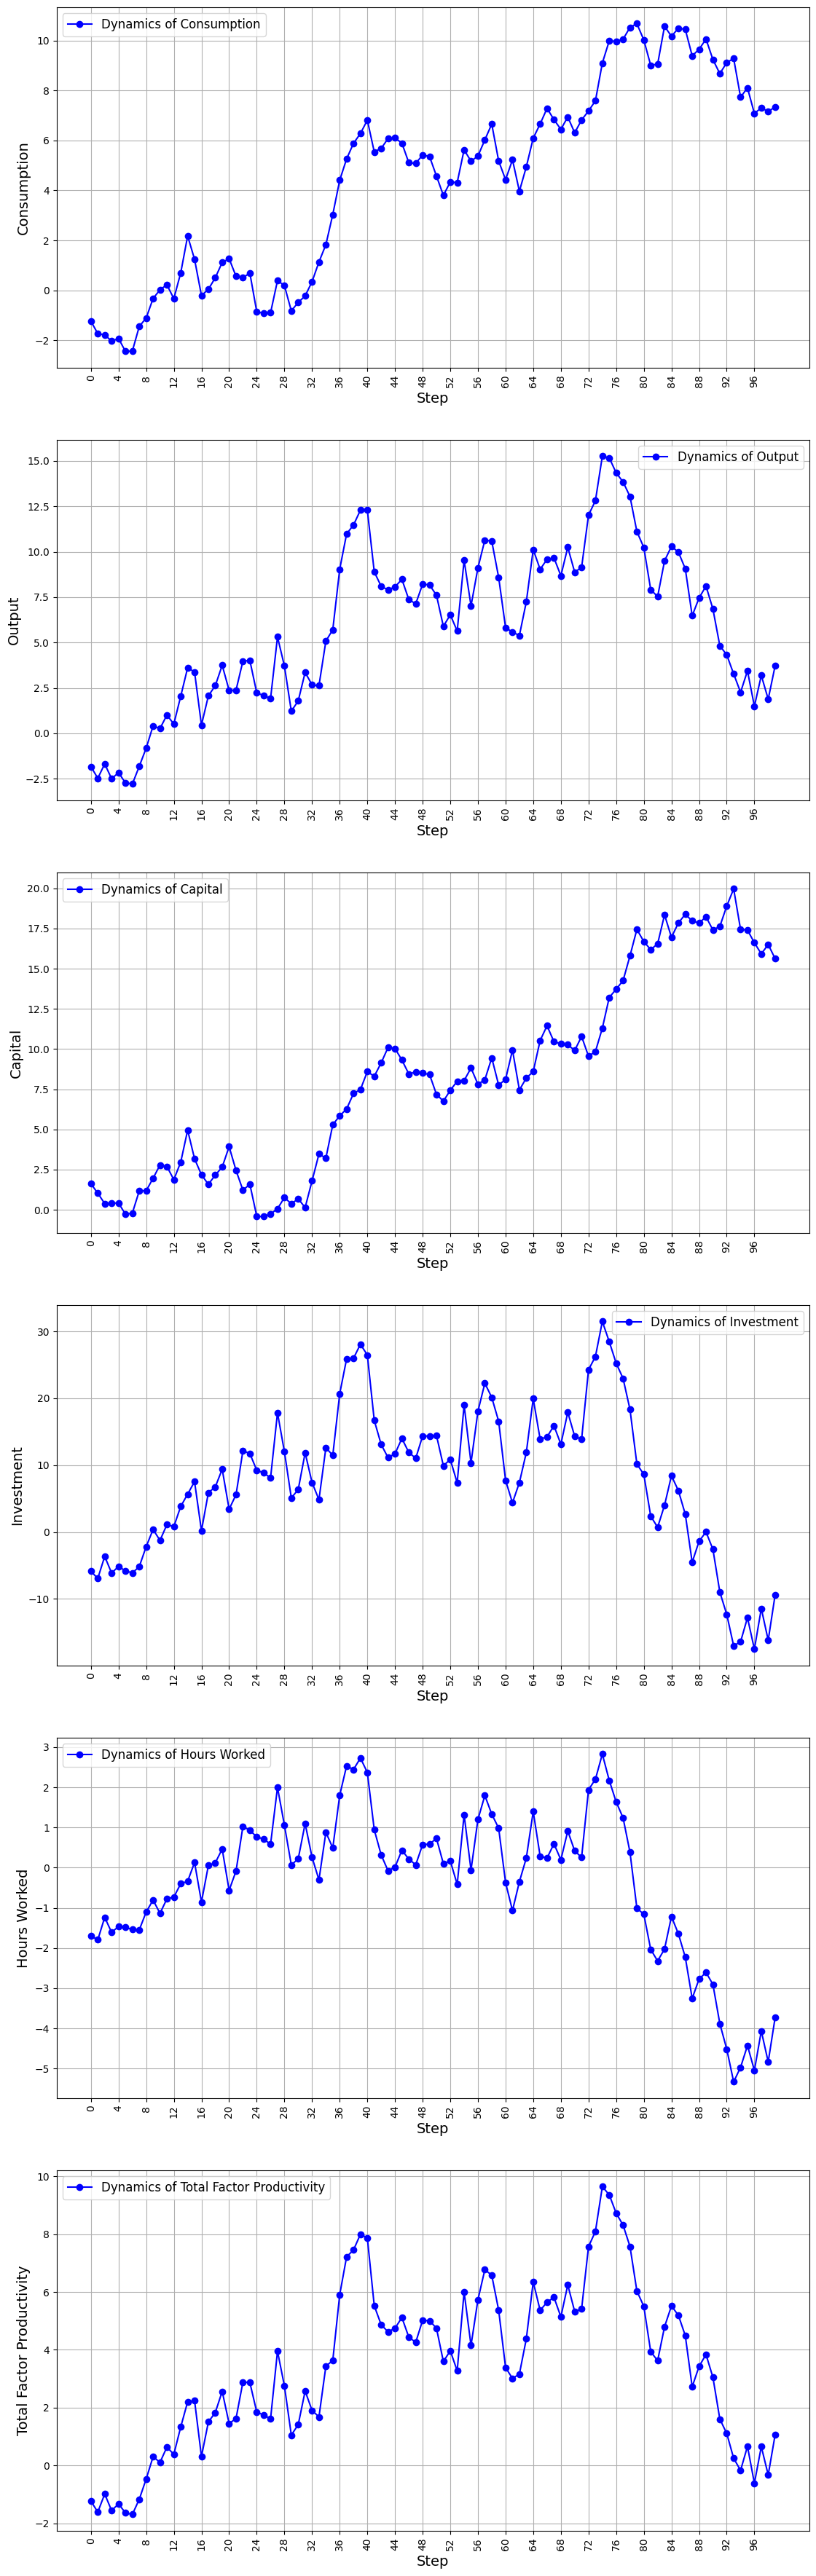

In [6]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Output", "Capital", "Investment", "Hours Worked", "Total Factor Productivity"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)
